<a href="https://colab.research.google.com/github/Shraddha-Deshmukh2119/CODECRAFT_DS_05/blob/main/CODECRAFT_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 5] Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors**

**Import necessary libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

**Load the dataset:**

In [ ]:
Accident_data=pd.read_csv(r'/content/Vehicle_Incidents_20250105.csv')
Accident_data.head()

,Incident Number,Incident Date,Time Num,Street,Alt Street,City,County,Intersection,Mile Post,Accident Type,...,Drug Involved,Alcohol Involved,Light Condition,Driver One Safety Equipment,Driver One Zip,Driver Two Safety Equipment,Driver Two Zip,Latitude,Longitude,Location WKT
0,23-107245,10/02/2023 01:36:00 PM,13.5,4707 Dodds ave,SR-0,Chattanooga,Hamilton,Rossville Blvd.,0.0,Property Damage Under,...,NaN,No,Daylight,None Used MV Occupant,30741,Unknown,Unknown,34.988402,-85.288209,POINT (-85.288209 34.988402)
1,23-101800,09/17/2023 05:27:00 PM,17.5,1101 Market St,SR-1,Chattanooga,Hamilton,W 12th St.,0.0,Possible Injury,...,No,No,Dawn,NaN,37402,None Used MV Occupant,37411,35.043187,-85.309693,POINT (-85.309693 35.043187)
2,23-101860,09/17/2023 08:12:00 PM,20.0,3536 Brainerd Rd,NaN,Chattanooga,Hamilton,S. Germantown Rd,NaN,Property Damage,...,No,No,Dark - Lighted,Unknown,Unknown,Shoulder and Lap Belt Used,37302,35.023823,-85.247288,POINT (-85.247288 35.023823)
3,23-101861,09/17/2023 08:13:00 PM,20.0,200 N Holtzclaw Ave,NaN,Chattanooga,Hamilton,E 3rd St,NaN,Suspected Minor Injury,...,No,No,Dark - Lighted,None Used MV Occupant,37401,Unknown,Unknown,34.989102,-85.289101,POINT (-85.289101 34.9891016)
4,23-100351,09/13/2023 04:05:00 PM,16.0,Broad St,NaN,Chattanooga,Hamilton,W. 20th St,NaN,Possible Injury,...,No,No,Daylight,Shoulder and Lap Belt Used,30741,Shoulder and Lap Belt Used,37402,35.033754,-85.313342,POINT (-85.313342 35.033754)


**Data overview:**

In [ ]:
Accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Incident Number              90852 non-null  object 
 1   Incident Date                90852 non-null  object 
 2   Time Num                     87599 non-null  float64
 3   Street                       90025 non-null  object 
 4   Alt Street                   19429 non-null  object 
 5   City                         90851 non-null  object 
 6   County                       90852 non-null  object 
 7   Intersection                 88907 non-null  object 
 8   Mile Post                    6969 non-null   float64
 9   Accident Type                90852 non-null  object 
 10  Collision Type               90262 non-null  object 
 11  Hit and Run                  90852 non-null  object 
 12  Involved Fatal Injury        90852 non-null  object 
 13  Involved Medical

**Check for Missing Values**

In [ ]:
missing_values=Accident_data.isnull().sum()
missing_values

,0
Incident Number,0
Incident Date,0
Time Num,3253
Street,827
Alt Street,71423
City,1
County,0
Intersection,1945
Mile Post,83883
Accident Type,0


**Handling Missing Values (Categorical):**

In [ ]:
Accident_data['Drug Involved'] = Accident_data['Drug Involved'].fillna('Unknown')
Accident_data['Alcohol Involved'] = Accident_data['Alcohol Involved'].fillna('Unknown')
Accident_data['Light Condition'] = Accident_data['Light Condition'].fillna('Unknown')

**Handling Missing Values (Dropping Rows):**

In [ ]:

Accident_data = Accident_data.dropna(subset=['Time Num', 'Latitude', 'Longitude', 'Location WKT'])



In [ ]:
Accident_data=Accident_data.dropna(subset=['Alt Street','Driver One Safety Equipment','Driver Two Safety Equipment'])


,0
Incident Number,0
Incident Date,0
Time Num,0
Street,540
Alt Street,0
City,0
County,0
Intersection,535
Accident Type,0
Collision Type,0


**Identify Data Types:**

**Dealing with missing values using Imputation**

In [ ]:
numeric_cols = Accident_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = Accident_data.select_dtypes(include=['object', 'category']).columns
datetime_cols = Accident_data.select_dtypes(include=['datetime64']).columns

In [ ]:
imputer = SimpleImputer(strategy='median')
imputer.fit(Accident_data[['Posted Speed']])
Accident_data['Posted Speed'] = imputer.fit_transform(Accident_data[['Posted Speed']])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(Accident_data[['Driver One Zip']])
Accident_data['Driver One Zip'] = imputer.fit_transform(Accident_data[['Driver One Zip']])[:, 0]

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(Accident_data[['Driver Two Zip']])
Accident_data['Driver Two Zip'] = imputer.fit_transform(Accident_data[['Driver Two Zip']])[:, 0]

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(Accident_data[['Intersection']])
Accident_data['Intersection'] = imputer.fit_transform(Accident_data[['Intersection']])[:, 0]

**Handling Missing Values ('Street' Column)**

In [ ]:
Accident_data['Street']=Accident_data['Street'].fillna('Unknown')

In [ ]:
missing_values=Accident_data.isnull().sum()
missing_values

,0
Incident Number,0
Incident Date,0
Time Num,0
Street,0
Alt Street,0
City,0
County,0
Intersection,0
Accident Type,0
Collision Type,0


**Check Data Types And Dealing with incorrect datatype**

In [ ]:
Accident_data.dtypes

,0
Incident Number,object
Incident Date,object
Time Num,float64
Street,object
Alt Street,object
City,object
County,object
Intersection,object
Accident Type,object
Collision Type,object


In [ ]:
Accident_data['Incident Date']=pd.to_datetime(Accident_data['Incident Date'])

<ipython-input-42-451d0fbe1dd9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Accident_data['Incident Date']=pd.to_datetime(Accident_data['Incident Date'])


In [ ]:
Accident_data.dtypes

,0
Incident Number,object
Incident Date,datetime64[ns]
Time Num,float64
Street,object
Alt Street,object
City,object
County,object
Intersection,object
Accident Type,object
Collision Type,object


**Handle Invalid Dates:**

In [ ]:

Accident_data = Accident_data.dropna(subset=['Incident Date'])

In [ ]:
Accident_data.head()

,Incident Number,Incident Date,Time Num,Street,Alt Street,City,County,Intersection,Accident Type,Collision Type,...,Driver Two Safety Equipment,Driver Two Zip,Latitude,Longitude,Location WKT,Hour,Day,Month,Year,Time of Day
0,23-107245,2023-10-02 13:36:00,13.5,4707 Dodds ave,SR-0,Chattanooga,Hamilton,Rossville Blvd.,Property Damage Under,"Sideswipe, Same Direction",...,Unknown,Unknown,34.988402,-85.288209,POINT (-85.288209 34.988402),13,2,10,2023,Afternoon
11,23-098937,2023-09-09 18:17:00,18.5,17800 Interstate 24 Wb ST,I-24,Chattanooga,Hamilton,178 I 24 WB ST,Possible Injury,Front to Rear,...,Shoulder and Lap Belt Used,30739,35.023788,-85.299570,POINT (-85.29957 35.023788),18,9,9,2023,Evening
19,23-099003,2023-09-09 22:41:00,22.5,18470 Interstate 24 Eastbound,I-24,Chattanooga,Hamilton,Interstate 24 Westbound,Possible Injury,Front to Rear,...,DOT Compliant Motorcycle Helmet,37416,35.004931,-85.227006,POINT (-85.227006 35.004931),22,9,9,2023,Night
35,23-100359,2023-09-13 16:30:00,16.5,190 Interstate 75 Southbound,I-75,Chattanooga,Hamilton,I24,Property Damage,Front to Rear,...,Shoulder and Lap Belt Used,42754,35.008382,-85.199798,POINT (-85.199798 35.008382),16,13,9,2023,Afternoon
61,23-100728,2023-09-14 15:00:00,15.0,5934 Highway 58,SR-58,Chattanooga,Hamilton,Deerwood Dr,Property Damage Under,Angle,...,Unknown,Unknown,35.114439,-85.128039,POINT (-85.128039 35.114439),15,14,9,2023,Afternoon


**Feature Engineering (Date and Time):**

In [ ]:
Accident_data['Hour']=Accident_data['Incident Date'].dt.hour
Accident_data['Day']=Accident_data['Incident Date'].dt.day
Accident_data['Month']=Accident_data['Incident Date'].dt.month
Accident_data['Year']=Accident_data['Incident Date'].dt.year

**Create 'Time of Day' Category:**

In [ ]:
def time_of_day(Hour):
  if 6<=Hour <12:
    return 'Morning'
  elif 12<=Hour <17:
    return 'Afternoon'
  elif 17<=Hour <21:
    return 'Evening'
  else:
    return 'Night'
Accident_data['Time of Day']=Accident_data['Hour'].apply(time_of_day)

In [ ]:
Accident_data['Time of Day']

,Time of Day
0,Afternoon
11,Evening
19,Night
35,Afternoon
61,Afternoon
...,...
90820,Afternoon
90830,Afternoon
90840,Evening
90846,Afternoon


**Exploratory Data Analysis (EDA):**

In [ ]:
# Accidents by Hour
hourly_accidents = Accident_data.groupby('Hour').size()

# Accidents by Light Condition
light_condition_accidents = Accident_data['Light Condition'].value_counts()

# Accidents by Accident Type
accident_type_counts = Accident_data['Accident Type'].value_counts()


print(hourly_accidents)
print(light_condition_accidents)
print(accident_type_counts)


Hour
0       87
1       76
2       78
3       65
4       84
5      173
6      391
7      864
8      818
9      559
10     580
11     800
12    1026
13    1095
14    1088
15    1103
16    1024
17    1123
18     721
19     336
20     250
21     289
22     287
23     188
dtype: int64
Light Condition
Daylight                   10148
Dark - Lighted              1553
Dark - Not Lighted           557
Dawn                         536
Dusk                         228
Dark - Unknown Lighting       63
Unknown                       16
Other                          4
Name: count, dtype: int64
Accident Type
Property Damage             8817
Property Damage Under       2262
Possible Injury             1638
Suspected Minor Injury       275
Suspected Serious Injury      82
Fatal                         31
Name: count, dtype: int64


**Accidents by Time of Day**

Text(0, 0.5, 'Number of Accidents')

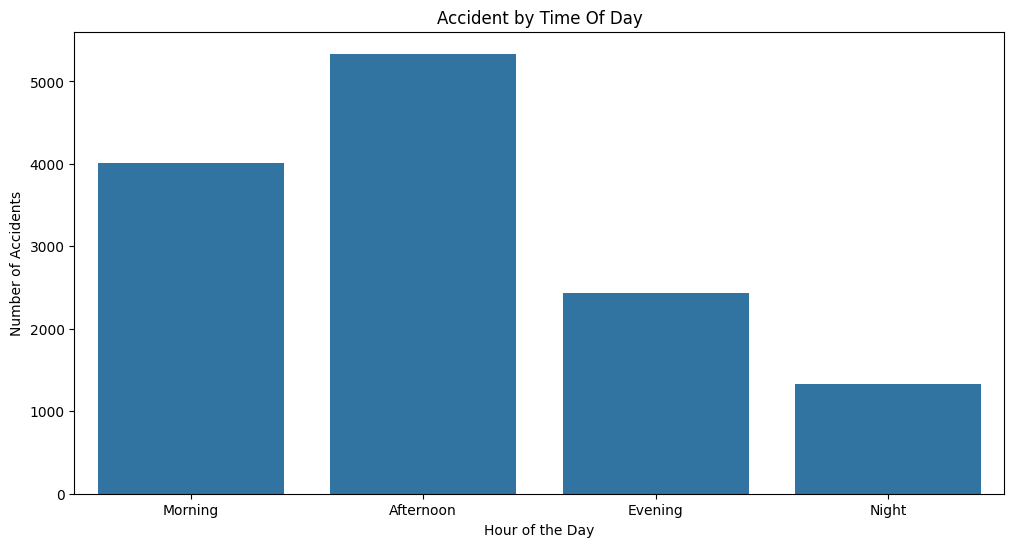

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Time of Day',data=Accident_data ,order=['Morning','Afternoon','Evening','Night'])
plt.title('Accident by Time Of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')

**Accident Type Distribution**

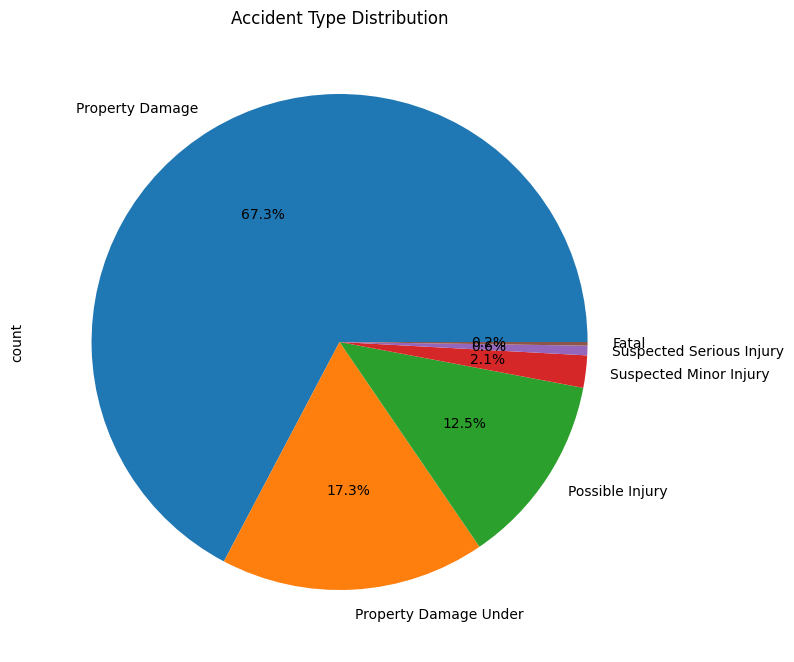

In [ ]:
Accident_data['Accident Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 9))
plt.title("Accident Type Distribution")
plt.show()

**Visualize Accident Hotspots**

In [ ]:
import folium
from folium.plugins import HeatMap

# Initialize a map
m = folium.Map(location=[Accident_data['Latitude'].mean(), Accident_data['Longitude'].mean()], zoom_start=12)

# Add a heatmap
heat_data = Accident_data[['Latitude', 'Longitude']].dropna().values.tolist()
HeatMap(heat_data).add_to(m)

# Save or display the map
m.save("accident_hotspots.html")


In [ ]:
m